<a href="https://colab.research.google.com/github/cordmaur/PythonForScientists/blob/main/Python4Scientists_Lesson4_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python for Scientists - Lesson 4



### Dictionaries
Similar to lists, but with a key to identify each item<br>
{key: value, key: value, key:value, ....}<br>
Keys are imutables <br>
<b>Note:</b> As of Python version 3.7, dictionaries are ordered. In Python 3.6 and earlier, dictionaries are unordered.






In [ ]:
# Students ages as list/tuples: how could we get the age of student named C
lst = [('A', 11), ('B', 9), ('C', 10)]
lst

In [ ]:
# solution: go through the list, check the first item of the tuple, if it is C, get the second item of the tuple...
desired_student = 'B'

for student in lst:
    if student[0] == desired_student:   
        print(f'Student {desired_student} has {student[1]} years old')

In [ ]:
# if data had been passed by 2 lists... we needed to use the common index to locate the age
names = ['A', 'B', 'C']
ages = [11, 9, 10]

desired_student = 'C'

idx = names.index(desired_student)
print(ages[idx])

In [ ]:
# using dictionaries
students = {'A': 11, 'B': 9, 'C': 10}
students

In [ ]:
students['C']

In [ ]:
# nothing prevent us to create inner dictionaries:
students = {
    'A': {'age': 11, 'Height': 145},
    'B': {'age': 9, 'Height': 144.2},
    'C': {'age': 10, 'Height': 147},
}

desired_student = 'C'
students[desired_student]

In [ ]:
students[desired_student]['age']

In [ ]:
desired_student = 'B'
print(f"Student {desired_student} has {students[desired_student]['age']} and measures {students[desired_student]['Height']}")

In [ ]:
# Dictionaries have 'keys' and 'values'

print(students.keys())
print(students.values())

## Dictionary Comprehension

Back to our hydrological example

In [ ]:
import random

# create the days and daily rain
# Fix the random seed 
random.seed(1)

daily_rain = []
day_of_month = []

for i in range(1, 32, 1):
    day_of_month.append(i)
    rainy = random.randint(0, 1)
    if rainy == 1:
        daily_rain.append(random.randint(0, 100))
    else:
        daily_rain.append(0)
    


In [ ]:
str(day_of_month), str(daily_rain)

In [ ]:
rain_dict = {day: rain for day, rain in zip(day_of_month, daily_rain)}
rain_dict

In [ ]:
rain_dict[6]

In [ ]:
max(rain_dict.values())

## Exercise


Answer these questions:
* number of days with rain
* day of the maximum rain and day of the minimum (non-zero) rain
* total rain
* mean rain
* <b>Challenge:</b> order the <b>days</b> according to the rain precipitation. Descending order (from highest to lowest). Ex: [12, 7, ...]

### Pandas Solution

In [ ]:
import pandas as pd

In [ ]:
series = pd.Series(rain_dict)
series

In [ ]:
(series > 0).sum()

In [ ]:
rainy_days = series[series > 0]

In [ ]:
rainy_days.max(), rainy_days.min()

In [ ]:
rainy_days

In [ ]:
rainy_days[rainy_days == rainy_days.max()].index

In [ ]:
rainy_days[rainy_days == rainy_days.min()].index

## Datetime Basics

What if I wanted to create a complete time series?

Let's test it with another data (river stage)

In [ ]:
import matplotlib.pyplot as plt

# Now I will create a random walk (non-stationary) to represent river stage
random.seed(2)

river_stage = [100]

for _ in range(365):
    river_stage.append(river_stage[-1] + random.randint(-2, 2))    

plt.plot(river_stage)

In [ ]:
# what happened on 1st of July? We could count, but it depends on the number of days that happen in february... :(

from datetime import datetime, timedelta

datetime.now()

In [ ]:
dt = datetime(2021, 1, 1)
dt

In [ ]:
dt2 = dt + timedelta(days=1)
dt2


In [ ]:
dt2 - dt

In [ ]:
dt2.day, dt2.month, dt2.year

## Dictionary comprehension

We want to create a series with datetime as the key

In [ ]:
# dictionary comprehension: 
# {key(X): value(X) for X in Iterable[list, tuple, etc...]}

# calc the squares
{x: x**2 for x in range(10)}

In [ ]:
first_day = datetime(2022, 1, 1)

# dictionary comprehension: {key(X): value(X) for X in Iterable[list, tuple, etc...]}
stages = {first_day + timedelta(days=i): stage for i, stage in enumerate(river_stage)}

In [ ]:
stages

In [ ]:
pd.Series(stages).plot()

## Example

What if we want to store the river stages for 3 different stations? Are dictionaries a viable solution?


In [ ]:
# create 3 stations
stations = [f'Station {i}' for i in range(1, 4)]
stations

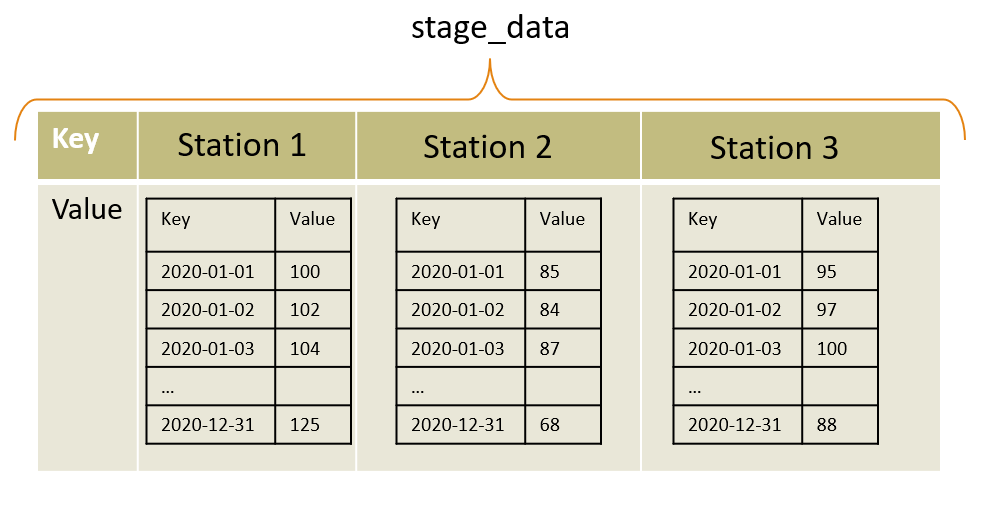

In [ ]:
random.seed(4)

stage_data = {}
first_day = datetime(2020, 1, 1)

for station in stations:

    print(f'Creating stage data for station {station}')

    # create a random series
    stages_list = [random.randint(50, 150)]
    for _ in range(364):
        stages_list.append(stages_list[-1] + random.randint(-2, 2))

    # create the stages dictionary with the dates and assign it to a specific station
    stage_data[station] = {first_day + timedelta(days=i): stage for i, stage in enumerate(stages_list)}



In [ ]:
stage_data['Station 1'][datetime(2020, 8, 30)]

In [ ]:
plt.figure(figsize=(15, 5))

for station in stations:
    plt.plot(list(stage_data[station].keys()), list(stage_data[station].values()), label=station)

plt.legend()

Doesn't it seem ackward? Dictionary inside another dictionary?

In [ ]:
# the indices are perfectly aligned
import pandas as pd

df = pd.DataFrame(stage_data)

df

## Exercise

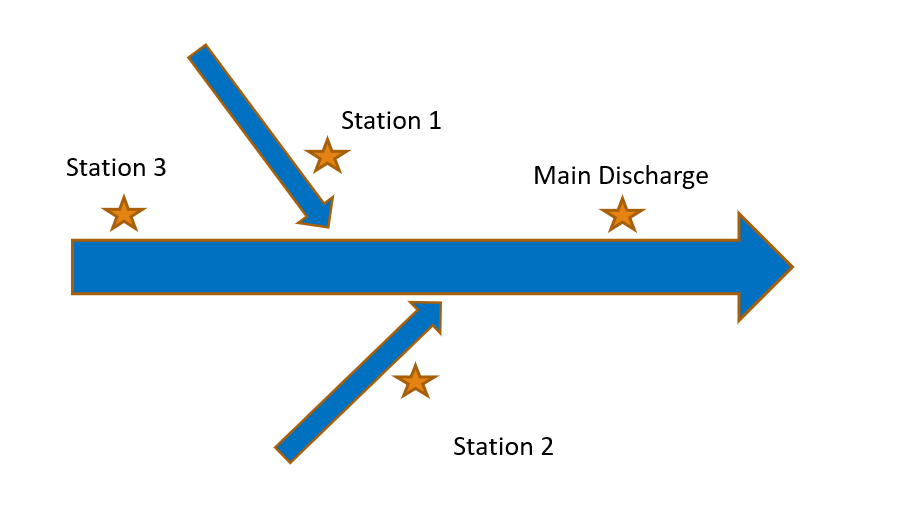

* The daily discharge on the main river?
* The mean discharge on the main river?
* The monthly mean discharge on the main river?
* The days of maximum and minimum discharge?

Using the pandas dataframe or not???